In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_sets/laptop_purchase.csv')

In [3]:
df.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80K-1.2L,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Below 30K,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80K-1.2L,Cash,Rare,3


### 1. Are there any missing values in the dataset? If yes, how would you handle them? -What strategies would you use for imputing missing values (e.g., mean, median, mode, forward fill)? 

In [5]:
df.isnull().sum() # no missing values in dataset

Customer_ID            0
Age                    0
Gender                 0
City                   0
Income_Level           0
Purchase_Mode          0
Brand_Purchased        0
Price_Range            0
Payment_Mode           0
Purchase_Frequency     0
Satisfaction_Rating    0
dtype: int64

### Do any columns contain duplicate entries or rows? How can you identify and remove them? -Why is it important to remove duplicates, and how would this impact analysis? 

In [8]:
df[df.duplicated()]

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating


### 3. Are there any outliers in the dataset, especially in numerical columns like Age or Income_Level? 

In [9]:
df.describe()

,Age,Satisfaction_Rating
count,5000.000000,5000.000000
mean,38.662200,2.994200
std,12.028492,1.416957
min,18.000000,1.000000
25%,28.000000,2.000000
50%,39.000000,3.000000
75%,49.000000,4.000000
max,59.000000,5.000000


Text(0.5, 1.0, 'Visualizing box plots to identify the outliers')

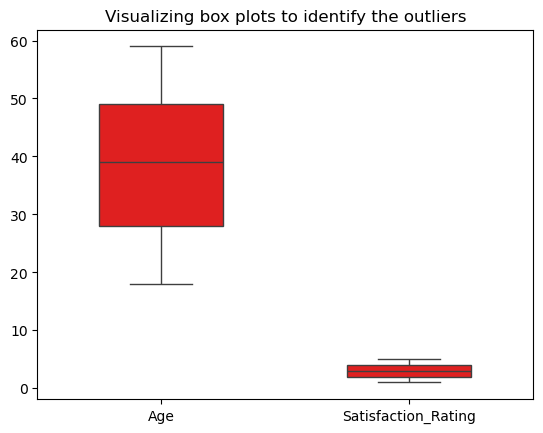

In [15]:
sns.boxplot(df, width=0.5, color='red') # used boxplot visualization for outlier detection
plt.title("Visualizing box plots to identify the outliers")

In [12]:
# for income level
df['Income_Level'].nunique()

3

In [14]:
df['Income_Level'].value_counts()

Income_Level
Medium    2540
Low       1464
High       996
Name: count, dtype: int64

### 4. Are the data types of the columns appropriate for analysis? 

In [16]:
df.dtypes

Customer_ID            object
Age                     int64
Gender                 object
City                   object
Income_Level           object
Purchase_Mode          object
Brand_Purchased        object
Price_Range            object
Payment_Mode           object
Purchase_Frequency     object
Satisfaction_Rating     int64
dtype: object

### 5. Do any columns contain inconsistent data entries (e.g., 'M' vs 'Male' for gender, or 'High' vs 1000 for Income_Level)? 

In [28]:
df.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Price_Range_50K-80K,Price_Range_80K-1.2L,Price_Range_Above 1.2L,Price_Range_Below 30K
0,CUST00001,56,Male,Pune,Low,Online,Dell,UPI,Rare,4,False,False,False,False
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Cash,Occasional,2,False,False,False,True
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,UPI,Occasional,3,False,True,False,False
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Credit Card,Rare,4,False,False,False,True
4,CUST00005,38,Female,Pune,High,Online,MSI,Cash,Rare,3,False,True,False,False


In [19]:
df.nunique()

Customer_ID            5000
Age                      42
Gender                    2
City                      9
Income_Level              3
Purchase_Mode             2
Brand_Purchased           8
Price_Range               5
Payment_Mode              5
Purchase_Frequency        3
Satisfaction_Rating       5
dtype: int64

### 6. Is the 'Price_Range' column numeric or categorical? Should it be encoded in any specific way for modeling? 

In [22]:
df['Price_Range'].dtype # checking datatype of specific column

dtype('O')

In [30]:
df['Price_Range'].unique()

array(['30K-50K', 'Below 30K', '80K-1.2L', '50K-80K', 'Above 1.2L'],
      dtype=object)

In [31]:
df = pd.get_dummies(df, columns=['Price_Range'], drop_first=False) # one hot encoding

In [32]:
df.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Price_Range_30K-50K,Price_Range_50K-80K,Price_Range_80K-1.2L,Price_Range_Above 1.2L,Price_Range_Below 30K
0,CUST00001,56,Male,Pune,Low,Online,Dell,UPI,Rare,4,True,False,False,False,False
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Cash,Occasional,2,False,False,False,False,True
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,UPI,Occasional,3,False,False,True,False,False
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Credit Card,Rare,4,False,False,False,False,True
4,CUST00005,38,Female,Pune,High,Online,MSI,Cash,Rare,3,False,False,True,False,False


### 7. Are there any columns with irrelevant or redundant information that can be removed for better analysis? 

In [33]:
df.nunique() # for observing unique values in each column

Customer_ID               5000
Age                         42
Gender                       2
City                         9
Income_Level                 3
Purchase_Mode                2
Brand_Purchased              8
Payment_Mode                 5
Purchase_Frequency           3
Satisfaction_Rating          5
Price_Range_30K-50K          2
Price_Range_50K-80K          2
Price_Range_80K-1.2L         2
Price_Range_Above 1.2L       2
Price_Range_Below 30K        2
dtype: int64

In [42]:
df.drop(columns=['Customer_ID'], inplace=True) # dropping customer_id, i feel it is not needed

In [39]:
corr_matrix = df.select_dtypes(include='number') # not found any columns with high correlation
print(corr_matrix.corr())

                          Age  Satisfaction_Rating
Age                  1.000000             0.018464
Satisfaction_Rating  0.018464             1.000000


In [40]:
df.nunique()

Customer_ID               5000
Age                         42
Gender                       2
City                         9
Income_Level                 3
Purchase_Mode                2
Brand_Purchased              8
Payment_Mode                 5
Purchase_Frequency           3
Satisfaction_Rating          5
Price_Range_30K-50K          2
Price_Range_50K-80K          2
Price_Range_80K-1.2L         2
Price_Range_Above 1.2L       2
Price_Range_Below 30K        2
dtype: int64

In [43]:
df.head()

,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Price_Range_30K-50K,Price_Range_50K-80K,Price_Range_80K-1.2L,Price_Range_Above 1.2L,Price_Range_Below 30K
0,56,Male,Pune,Low,Online,Dell,UPI,Rare,4,True,False,False,False,False
1,46,Female,Kolkata,Medium,Online,MSI,Cash,Occasional,2,False,False,False,False,True
2,32,Male,Bangalore,Low,Online,Samsung,UPI,Occasional,3,False,False,True,False,False
3,25,Female,Jaipur,Medium,Offline,Samsung,Credit Card,Rare,4,False,False,False,False,True
4,38,Female,Pune,High,Online,MSI,Cash,Rare,3,False,False,True,False,False


### Does the 'Purchase_Frequency' column need to be transformed or normalized (e.g., weekly to monthly)? ○ What kind of transformations would help to better understand patterns?

In [46]:
print(df['Purchase_Frequency'].unique())

['Rare' 'Occasional' 'Frequent']


In [49]:
def encoding(value):
    if value == 'Rare':
        return 2
    elif value == 'Occasional':
        return 1
    elif value == 'Frequent':
        return 0

df['Purchase_Frequency_encoded'] = df['Purchase_Frequency'].apply(encoding)

In [50]:
df.head()

,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Price_Range_30K-50K,Price_Range_50K-80K,Price_Range_80K-1.2L,Price_Range_Above 1.2L,Price_Range_Below 30K,Purchase_Frequency_encoded
0,56,Male,Pune,Low,Online,Dell,UPI,Rare,4,True,False,False,False,False,2
1,46,Female,Kolkata,Medium,Online,MSI,Cash,Occasional,2,False,False,False,False,True,1
2,32,Male,Bangalore,Low,Online,Samsung,UPI,Occasional,3,False,False,True,False,False,1
3,25,Female,Jaipur,Medium,Offline,Samsung,Credit Card,Rare,4,False,False,False,False,True,2
4,38,Female,Pune,High,Online,MSI,Cash,Rare,3,False,False,True,False,False,2


### . Is there any need to transform the 'Income_Level' column into a continuous variable? ○ Could you combine income categories into broader ranges or scale them for analysis? 

In [51]:
income_mapping= {'Low':0, 'Medium':1,'High':2}
df['Income_Level_encoded'] = df['Income_Level'].map(income_mapping)

In [52]:
df.head()

,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Price_Range_30K-50K,Price_Range_50K-80K,Price_Range_80K-1.2L,Price_Range_Above 1.2L,Price_Range_Below 30K,Purchase_Frequency_encoded,Income_Level_encoded
0,56,Male,Pune,Low,Online,Dell,UPI,Rare,4,True,False,False,False,False,2,0
1,46,Female,Kolkata,Medium,Online,MSI,Cash,Occasional,2,False,False,False,False,True,1,1
2,32,Male,Bangalore,Low,Online,Samsung,UPI,Occasional,3,False,False,True,False,False,1,0
3,25,Female,Jaipur,Medium,Offline,Samsung,Credit Card,Rare,4,False,False,False,False,True,2,1
4,38,Female,Pune,High,Online,MSI,Cash,Rare,3,False,False,True,False,False,2,2


### 10. Are there any date-related columns (e.g., transaction date) that need to be parsed and converted into proper date formats?

# Exploratory Data Analysis

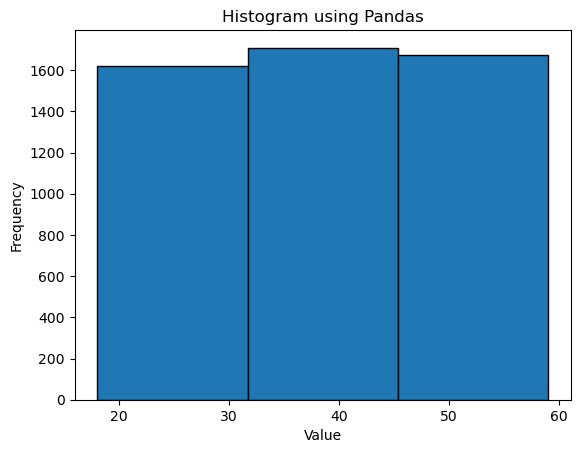

In [54]:
df['Age'].plot(kind='hist', bins=3, edgecolor='black')
plt.title('Histogram using Pandas')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age'>

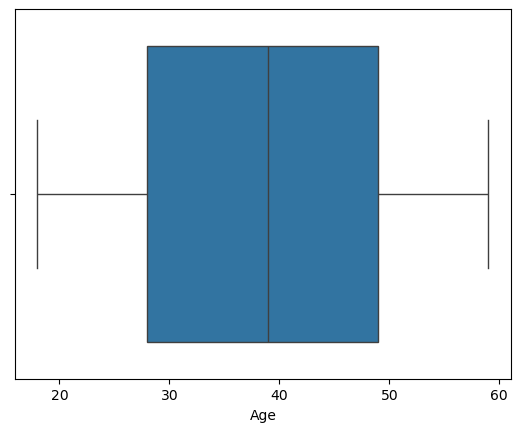

In [55]:
sns.boxplot(x=df['Age'])

In [56]:
age_skewness = df['Age'].skew() # calculate skewness
age_skewness

-0.02983117302667299

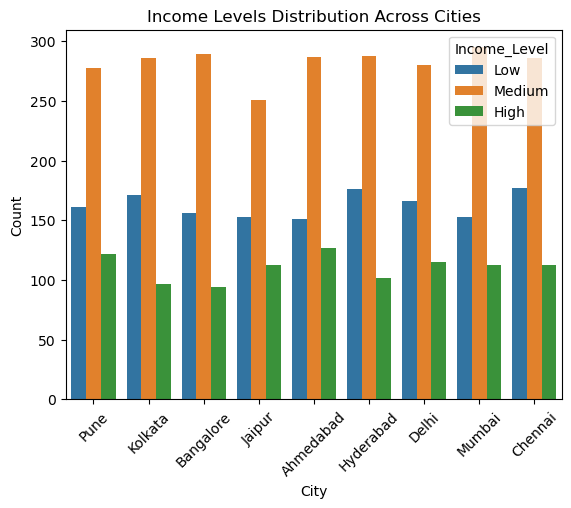

In [59]:
sns.countplot(data=df, x='City', hue='Income_Level')
plt.title('Income Levels Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: >

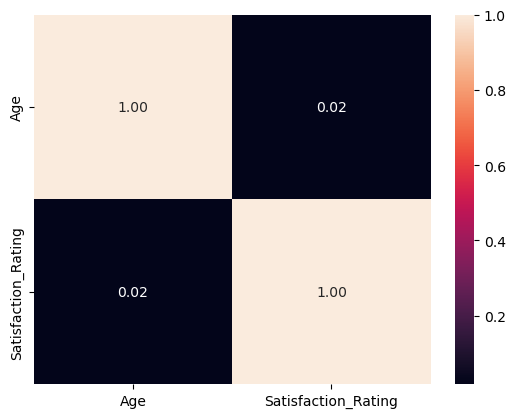

In [60]:
sns.heatmap(corr_matrix.corr(), fmt='.2f', annot=True)

In [63]:
print(df['Purchase_Mode'].unique())

['Online' 'Offline']


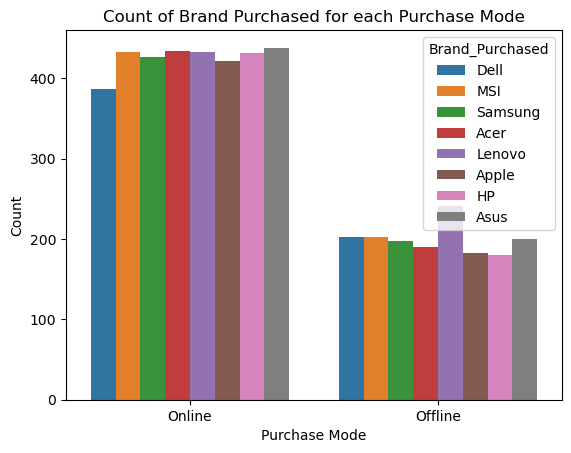

In [66]:
sns.countplot(data=df, x='Purchase_Mode', hue='Brand_Purchased')
plt.title('Count of Brand Purchased for each Purchase Mode')
plt.xlabel('Purchase Mode')
plt.ylabel('Count')
plt.show()

In [67]:
new_df = df.select_dtypes(include='number')

<Axes: >

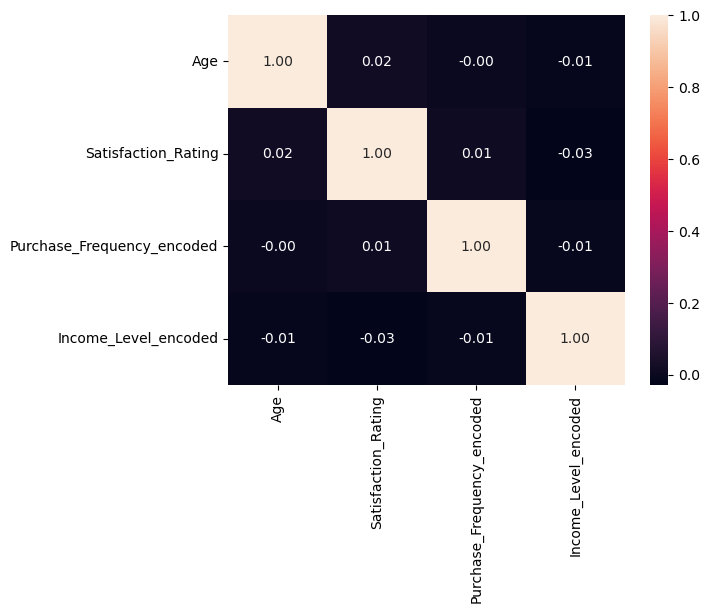

In [69]:
new_df.corr()
sns.heatmap(new_df.corr(), fmt='.2f', annot=True)

In [70]:
df.head()

,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Price_Range_30K-50K,Price_Range_50K-80K,Price_Range_80K-1.2L,Price_Range_Above 1.2L,Price_Range_Below 30K,Purchase_Frequency_encoded,Income_Level_encoded
0,56,Male,Pune,Low,Online,Dell,UPI,Rare,4,True,False,False,False,False,2,0
1,46,Female,Kolkata,Medium,Online,MSI,Cash,Occasional,2,False,False,False,False,True,1,1
2,32,Male,Bangalore,Low,Online,Samsung,UPI,Occasional,3,False,False,True,False,False,1,0
3,25,Female,Jaipur,Medium,Offline,Samsung,Credit Card,Rare,4,False,False,False,False,True,2,1
4,38,Female,Pune,High,Online,MSI,Cash,Rare,3,False,False,True,False,False,2,2


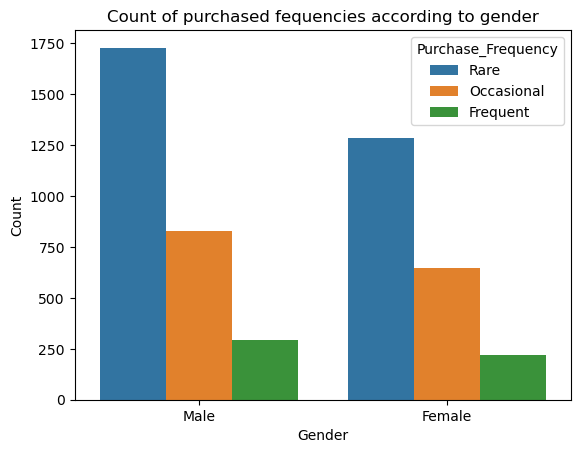

In [72]:
sns.countplot(data=df, x='Gender', hue='Purchase_Frequency')
plt.title('Count of purchased fequencies according to gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

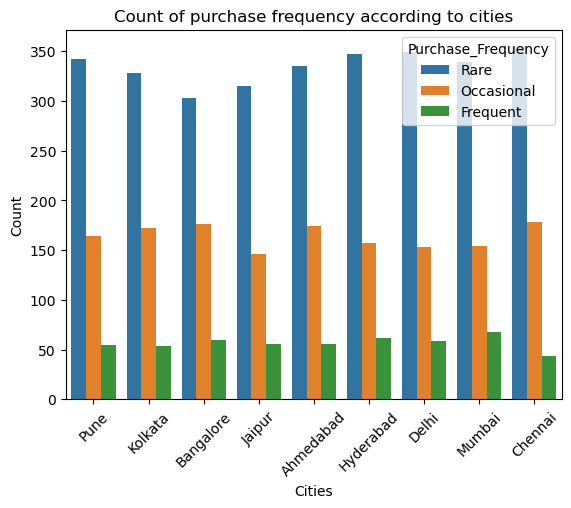

In [80]:
sns.countplot(df, x='City', hue='Purchase_Frequency')
plt.title('Count of purchase frequency according to cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Brand_Purchased', ylabel='count'>

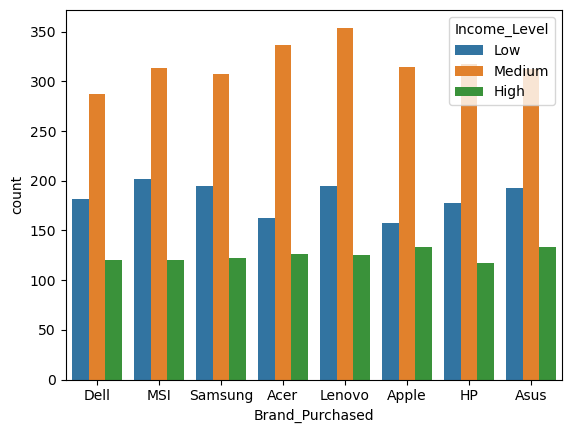

In [83]:
sns.countplot(df, x='Brand_Purchased', hue='Income_Level')

In [7]:
data = pd.DataFrame({
    'brands': df['Brand_Purchased'],
    'income': df['Income_Level']
})

data['brands_encoded'] = data['brands'].astype('category').cat.codes
data['income_encoded'] = data['income'].astype('category').cat.codes

correlation = data[['brands_encoded', 'income_encoded']].corr()
correlation
# sns.heatmap(correlation, fmt='.2f', annot=True)

,brands_encoded,income_encoded
brands_encoded,1.000000,-0.001133
income_encoded,-0.001133,1.000000
